In [1]:
!pip install -q sunpy[net,timeseries]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.2/229.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.7 MB/s eta 0:00:00


In [55]:
import matplotlib.pyplot as plt
import numpy as np
from sunpy import timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a
from matplotlib import dates
from astropy.time import Time
from astropy.visualization import quantity_support, time_support
time_support()

<astropy.visualization.time.time_support.<locals>.MplTimeConverter at 0x136af1870>

# Download Data
**Edit tstart and tend to set data time**

In [3]:
tstart = "2017-09-06 00:00"
tend = "2017-09-11 23:59"
goes_sat = 16   #Since March 2020, GOES 15 is unsupported. Use 16 and 17.

#search for goes data
result_goes = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"),
                          a.goes.SatelliteNumber(goes_sat))
#download GOES data
file_goes = Fido.fetch(result_goes)
#make TimeSeries
goes = ts.TimeSeries(file_goes, concatenate=True)

Files Downloaded:   0%|          | 0/12 [00:00<?, ?file/s]

sci_xrsf-l2-flx1s_g16_d20170906_v2-2-0.nc:   0%|          | 0.00/5.39M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20170909_v2-2-0.nc:   0%|          | 0.00/5.23M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20170907_v2-2-0.nc:   0%|          | 0.00/5.34M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20170908_v2-2-0.nc:   0%|          | 0.00/5.27M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20170910_v2-2-0.nc:   0%|          | 0.00/5.44M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20170911_v2-2-0.nc:   0%|          | 0.00/5.73M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20170906_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20170907_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20170908_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20170909_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20170910_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20170911_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

# Plot Data
**Optional edit ylim by uncommenting and changing limits**

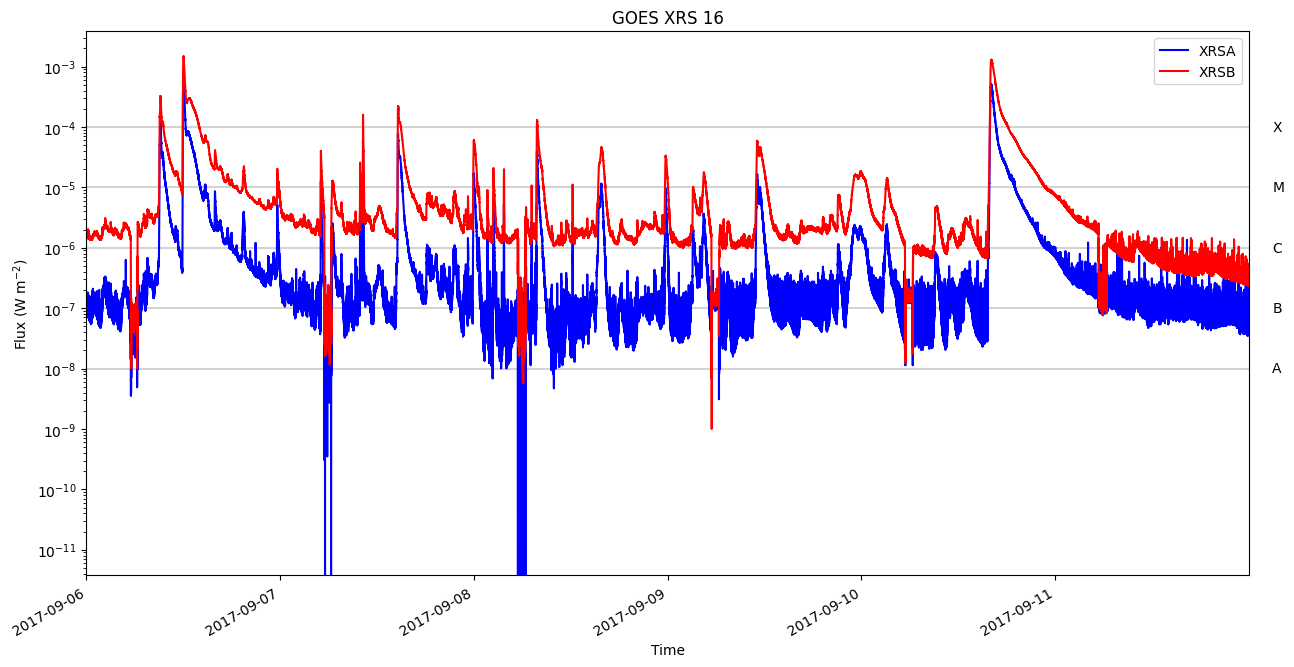

In [65]:
#Plotting (the old code)
fig, ax = plt.subplots(figsize=(15,8))
#plotting the GOES XRS data
ax.plot(goes.time, goes.quantity("xrsa"), color='blue', label='XRSA')
ax.plot(goes.time, goes.quantity("xrsb"), color='red', label='XRSB')

# ax.set_ylim(1e-8,1e-5)    #EDIT (UNCOMMENT) TO CHANGE Y LIMITS

plt.legend()
#set the title and labels
ax.set_title(f'GOES XRS {goes_sat}')
ax.set_xlabel("Time")
ax.set_ylabel("Flux (W m$^{-2}$)")
ax.set_yscale('log')
#set the time limits
tmin = "2017-09-06 00:00"
tmax = "2017-09-11 23:59"
ax.set_xlim(Time(tmin),Time(tmax))
# set ticks for x-axis to correspond to 24 hr intervals
ax.xaxis.set_major_locator(dates.HourLocator(interval=24))

fl_class = ['A', 'B', 'C', 'M', 'X']         #flare class letters
fl_stren = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4]    #flare class strengths
for l, hline in enumerate(fl_stren): #for each flare class
    if ax.get_ylim()[0]<=hline<=ax.get_ylim()[1]: #if flare class is within plot limits
        ax.axhline(hline, ls='-', color='lightgrey', zorder=-10) #draw line
        ax.annotate(fl_class[l], xy=(1.02,hline*1.0), #label flare class
                    xycoords=ax.get_yaxis_transform(), verticalalignment="center")
fig.autofmt_xdate() #automatically format times on x axis
fig.patch.set_alpha(1.0)

plt.show()

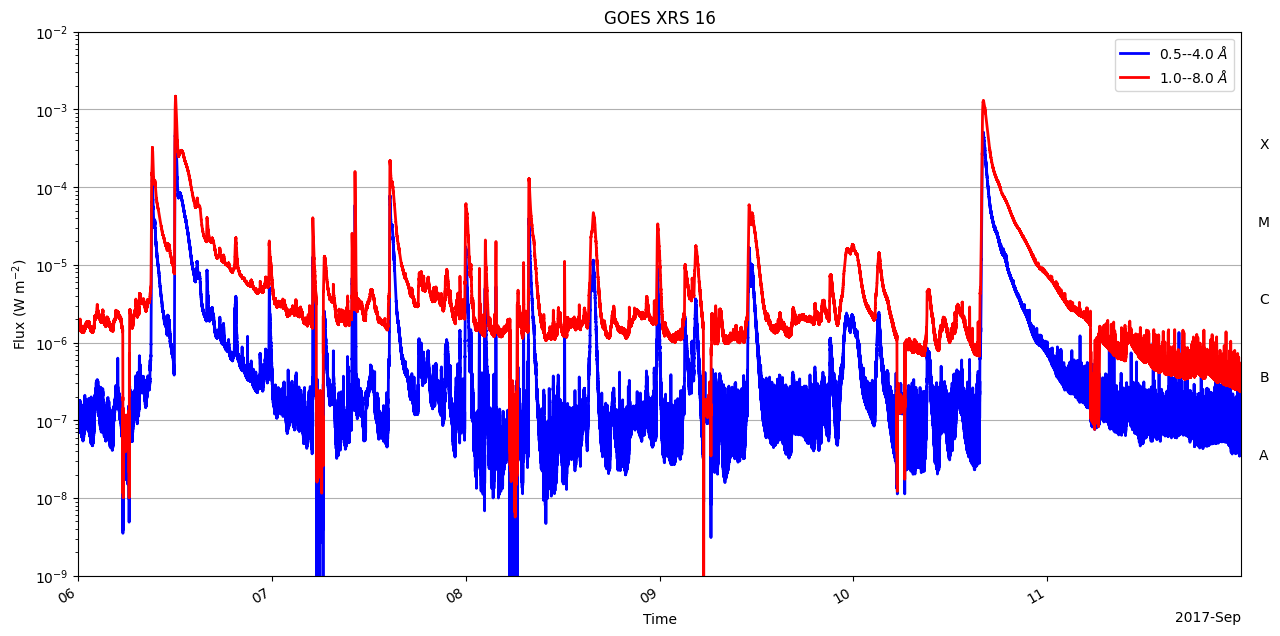

In [73]:
# new code
fig, ax = plt.subplots(figsize=(15,8))
goes.plot(axes=ax)

# ax.set_ylim(1e-8,1e-5)    #EDIT (UNCOMMENT) TO CHANGE Y LIMITS

ax.set_title(f'GOES XRS {goes_sat}')
ax.set_xlabel("Time")
ax.set_ylabel("Flux (W m$^{-2}$)")
ax.set_yscale('log')
#set the time limits
tmin = "2017-09-06 00:00"
tmax = "2017-09-11 23:59"
ax.set_xlim(Time(tmin).to_datetime(),Time(tmax).to_datetime())
# set ticks for x-axis to correspond to 24 hr intervals
ax.xaxis.set_major_locator(dates.HourLocator(interval=24))
fig.autofmt_xdate() #automatically format times on x axis
fig.patch.set_alpha(1.0)
plt.show()